![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def veryclose(a, b):
    return np.allclose(a, b, rtol=1e-12, atol=1e-12)

# Parte 1: Calculando raízes com a segunda derivada

Vimos, em aula, que o Método de Newton usa a primeira derivada da função $f$
para calcular uma aproximação linear da função, e sucessivamente se aproximar do mínimo.

Nesta parte, iremos usar a segunda derivada também.

## Questão 1: Fórmulas

Sejam dados
$$\begin{align*}
  f(x_0) & = v_0 \\
 f'(x_0) & = v_1 \\
f''(x_0) & = v_2
\end{align*}$$

Dê, em função de $x_0$, $v_0$, $v_1$ e $v_2$, as raizes da parábola correspondente.
Em particular, mostre que as raízes (se existirem) são da forma $x_0 + \text{passo}$.

Integrando as relações, conseguimos achar a nossa f(x0) em função das derivadas. E achamos que $f(x_0)=V_2x_0^2 - V_1x_0 + v_0$.
Logo conseguimos achar raízes por bhaskara.

Qual raiz você escolheria?  Porquê?

Escolheria a raiz onde seria (V1 - (Raiz De V_1^2 - 4*V_2*V_))/4*V2
Isto porque no newton também é menos algo 

## Questão 2: O passo

Escreva a função `step(v0, v1, v2)` que dá o passo a ser feito.

Se a parábola não possuir raiz, use, simplesmente, a regra original do método de Newton.

In [12]:
def step2(v0, v1, v2):
    valor = v1**2 - 4*v0*v2
    return np.sqrt(valor)
step2(1, 2, 2)

C:\Users\aluno\AppData\Local\Temp/ipykernel_1876/1048185275.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(valor)


nan

In [5]:
assert step2(1, 2, 2) == -1

AssertionError: 

In [ ]:
assert step2(1, 1, 1) == -1

In [ ]:
assert np.isclose(step2(-1, 1, 0.2), 0.9160797831)

In [ ]:
# Um teste mais difícil, não se preocupe muito se não passar
assert np.isclose(step2(-1,  1, -0.2), 1.1270166538)
assert np.isclose(step2( 1, -1,  0.2), 1.1270166538)

Explique porque os passos dos dois `assert`s da última caixa devem ser iguais.

Pois, os dados oferecidos são os mesmo em módulo. Logo quando aplicamos o método um sinal contrapõe o outro

## Questão 3: Newton

Dê, abaixo, o método de Newton, e também o método de "Newton com segunda derivada",
retornando a lista de todos os pontos visitados a partir de `x0`, inclusive.

O critério de parada será, para os dois, quando o tamanho do passo, _relativo ao ponto atual_,
for menor do que a precisão indicada por `reltol`.
(mas agora que você já calculou o passo, use-o, não custa quase nada!)

In [24]:
def newton(f, df, x0, maxsteps=100, reltol=1e-12):
    pontos = [x0]
    
    for i in range(maxsteps):
        passo = f(x0)/df(x0)
        x = x0 - f(x0)/df(x0)
        pontos.append(x)
        x0 = x
        if abs(passo) < reltol:
            return pontos
        
    return pontos

def newton2(f, df, ddf, x0, maxsteps=100, reltol=1e-12):
    # YOUR CODE HERE
    raise NotImplementedError()

In [26]:
xs_newton = newton(lambda x: np.exp(x) - 10, np.exp, 1)

assert len(xs_newton) == 9
assert veryclose(np.exp(xs_newton[-1]), 10)

In [27]:
xs_newton2 = newton2(lambda x: np.exp(x) - 10, np.exp, np.exp, 1, maxsteps=10)

assert len(xs_newton2) == 6
assert veryclose(np.exp(xs_newton2[-1]), 10)

NotImplementedError: 

Faça, agora, o gráfico do erro para cada um dos métodos ao calcular uma raiz de $e^x = 10$:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Este resultado é esperado? Comente

YOUR ANSWER HERE

Ambos os métodos fizeram uma iteração que "não saiu do lugar".
Explique porque eles não pararam na iteração anterior.

YOUR ANSWER HERE

## Questão 4: Uma outra função

Use ambos os métodos para encontrar uma raiz de $xe^x = 10$.

Dê, abaixo, as funções auxiliares:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Agora, calcule os pontos gerados por ambos os métodos, começando a partir de $x_0 = 1$:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça o gráfico do erro "em $y$", ou seja, o quanto a equação está errada (já que não temos a solução analítica).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Comente, novamente, os resultados, indicando eventuais semelhanças e diferenças com o caso anterior.

YOUR ANSWER HERE

# Parte 2: Calculando integrais

Dê, abaixo, os métodos do retângulo, trapézio e ponto médio.

In [103]:
def rectangle(f, a, b, n=100):
    pontos, h = np.linspace(a, b, n, retstep=True, endpoint=False)
    area = np.sum(f(pontos))*h
    
    return area
    
def trap(f, a, b, n=100):
    pontos, h = np.linspace(a, b, n, retstep=True, endpoint=False)
    area = np.sum(f(pontos) + f(pontos+h)) * h/2
    
    return area

def midpoint(f, a, b, n=100):
    pontos, h = np.linspace(a, b, n, retstep=True, endpoint=False)
    area = np.sum(f(pontos+h/2))*h
    
    return area
    
methods = [rectangle, trap, midpoint]

In [33]:
assert not np.isclose(rectangle(np.sin, 0, 1), 1 - np.cos(1))

In [32]:
assert np.isclose(trap(np.sin, 0, 1), 1 - np.cos(1))

In [34]:
assert np.isclose(midpoint(np.sin, 0, 1), 1 - np.cos(1))

## Questão 5: Integrando o cosseno

Faça o gráfico do erro de integração da função cosseno, no intervalo $[0, 2\pi]$,
para $n$ indo de $1$ até $30$,
para cada um dos métodos.

In [43]:
np.linspace(1, 2*np.pi, 10)

array([1.        , 1.58702059, 2.17404118, 2.76106177, 3.34808236,
       3.93510295, 4.52212354, 5.10914413, 5.69616472, 6.28318531])

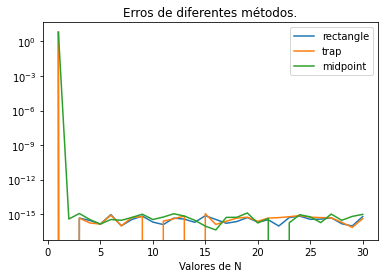

In [75]:
ns = range(1,30+1)

analitica = 0
for m in methods:
    erros = []
    for n in ns:
        numerica = m(np.cos, 0, 2*np.pi, n)
        erro = abs(analitica - numerica)
        erros.append(erro)
    plt.semilogy(ns, erros, label=m.__name__)
plt.legend()
plt.title('Erros de diferentes métodos.')
plt.xlabel('Valores de N')
ax = plt.gca()

In [59]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

O que você percebe neste gráfico?  Como você explica?

Que devido a ser uma integral simétrica, todos os erros são praticamente impercetíveis. Entretanto, tanto o retângulo quanto o trapézio apresentam um acerto 'perfeito' mesmo com um N muito baixo. E é possível perceber que existe um certo limite até onde vai a melhora da precisão, não podemos apenas sair aumentando o N achando que melhorará sempre a precisão.

Repita para o intervalo $[0, \pi]$.
Agora, faça cada método em uma figura separada:

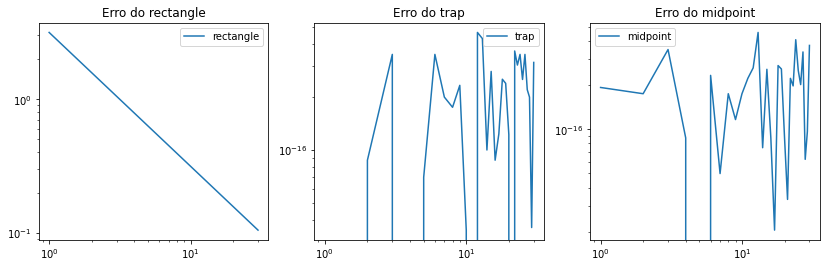

In [101]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4))
ns = range(1,30+1)

analitica = 0
for m, ax in zip(methods,axs):
    erros = []
    for n in ns:
        numerica = m(np.cos, 0, np.pi, n)
        erro = abs(analitica - numerica)
        erros.append(erro)
    ax.loglog(ns, erros, label=m.__name__)
    ax.legend()
    ax.set_title(f'Erro do {m.__name__}')
ax = plt.gca()

In [102]:
for ax in axs:
    assert len(ax.lines) == 1
    assert len(ax.get_title()) >= 1

Comente as semelhanças e diferenças do caso anterior.

A principal diferença se dá no método do retângulo, pois nesse intervalo não há simetria. Logo ele volta a apresentar erros altissímos comparado aos outros métodos.

Qual a velocidade de convergência de cada um dos métodos para a integral no intervalo $[0, \pi]$?

Como não há simetria para o retângulo se aproveitar, ele possui ordem de convergência 1.
Ambos os outros apresentam um erro quase 0.

## Questão 6: Uma outra função

Calcule a integral de $\frac{1}{2 + \cos(x)}$ no intervalo $[0, 2\pi]$, com cada um dos métodos,
e faça novamente o gráfico do erro em função do número de subdivisões.

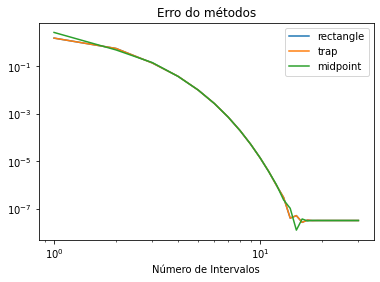

In [117]:
ns = range(1,30+1)

def f(x):
    return 1/(2+np.cos(x))

analitica = 3.62759876

for m in methods:
    erros = []
    for n in ns:
        numerica = m(f, 0, 2*np.pi, n)
        erro = abs(analitica - numerica)
        erros.append(erro)
    plt.loglog(ns, erros, label=m.__name__)
plt.legend()
plt.title(f'Erro do métodos')
plt.xlabel('Número de Intervalos')
ax = plt.gca()

In [116]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

* Qual a velocidade de convergência de cada um dos métodos?
* Qual método parece ser mais rápido?

Estranhamente, todos os métodos parecem ter uma mesma ordem de convergência. Ordem 2.

Agora, repita para o intervalo $[0, \pi/2]$.

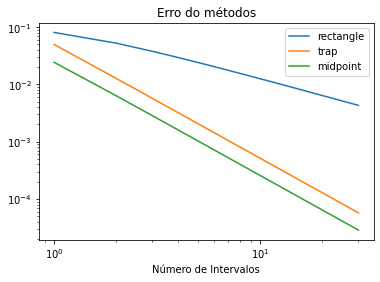

In [119]:
ns = range(1,30+1)

def f(x):
    return 1/(2+np.cos(x))

analitica = np.pi/(27**(1/2))

for m in methods:
    erros = []
    for n in ns:
        numerica = m(f, 0, np.pi/2, n)
        erro = abs(analitica - numerica)
        erros.append(erro)
    plt.loglog(ns, erros, label=m.__name__)
plt.legend()
plt.title(f'Erro do métodos')
plt.xlabel('Número de Intervalos')
ax = plt.gca()

Compare com os resultados para a integral no intervalo $[0, 2\pi]$.

Me parece que neste intervalo, os métodos utilizados não são bons o suficiente. Todos possuem erros da escala de 1e-4. E parece que a ordem de convergência deles é 1.

## Questão 7: E mais uma

$$\int_0^{2\pi} \frac{dx}{1 + 2\cos^2(x)}$$

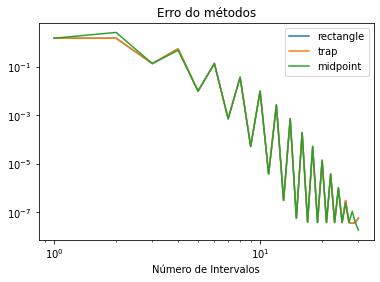

In [122]:
ns = range(1,30+1)

def f(x):
    return 1/(1+2*np.cos(x)**2)

analitica = 3.6275987656

for m in methods:
    erros = []
    for n in ns:
        numerica = m(f, 0, 2*np.pi, n)
        erro = abs(analitica - numerica)
        erros.append(erro)
    plt.loglog(ns, erros, label=m.__name__)
plt.legend()
plt.title(f'Erro do métodos')
plt.xlabel('Número de Intervalos')
ax = plt.gca()

In [121]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

Compare com o que você obteve para a função $\frac{1}{1 + 2 \cos(x)}$:
- O que você percebe de semelhante?
- O que há de diferente?
- Como você explica as diferenças e similaridades?

A semelhança é que converge pro mesmo ponto.
A diferença é na estabilidade da convergência.
A grande diferença provavelmente se dá pois esta função representa um algoritmo muito instável, logo apresenta essas grandes oscilações. Mas é possível perceber ele ainda assim diminui com o aumentar dos N.

## Questão 8: A última

Calcule

$$\int_0^{2\pi} \frac{\sin(1999x)}{\sin(x)}$$

pelo método do ponto médio, variando o número de subdivisões entre $2$ e $2000$ como abaixo,
e faça o gráfico do **valor da integral** ao variar $n$.

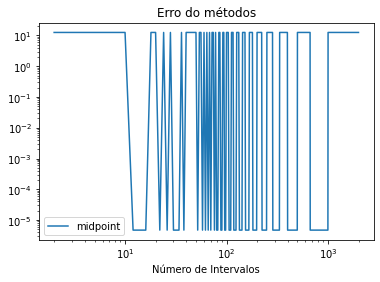

In [131]:
ns = range(2,2000,2)

def f(x):
    return np.sin(1999*x)/np.sin(x)

analitica = 6.28319
erros = []

for n in ns:
    numerica = midpoint(f, 0, 2*np.pi, n)
    erro = abs(analitica - numerica)
    erros.append(erro)

plt.loglog(ns, erros, label=m.__name__)
plt.legend()
plt.title(f'Erro do métodos')
plt.xlabel('Número de Intervalos')
ax = plt.gca()

O que você vê no gráfico?

Uma gigantesca oscilação, por conta de algoritmo instável.

Explique porque usar o método do ponto médio, e porque usar um número par de subdivisões.

Usando um número par de subdivisões temos que conseguimos 

### Bônus

Como você faria para ter certeza do valor correto da integral?
Explique suas ideias abaixo, e faça contas, se desejar, na caixa seguinte.

Creio que usaria o método de simpson. talvez não na regra 1/3, e sim na mais avançado regra 3/8 de simpson.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()